# House price prediction in new capital.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
df = pd.read_excel("E:\ml_project\Book3.xlsx")
num_columns = len(df.columns)
print("number of features=",num_columns)
pd.set_option("display.max_columns", num_columns)
df.head(20)

number of features= 9


,Area,Bedroom,Bathroom,Floor,Services,Furnished,Price,Hotel,Compound
0,170,3,2,2,yes,no,2200000,no,yes
1,208,3,2,2,yes,no,2600000,no,yes
2,134,2,2,3,yes,no,1407000,no,yes
3,190,3,3,3,yes,no,1800000,no,yes
4,123,2,1,4,yes,yes,9225000,yes,no
5,305,4,4,5,yes,no,6650000,no,yes
6,120,2,1,6,no,no,960000,no,yes
7,190,3,3,7,yes,no,2573000,no,yes
8,135,2,2,2,yes,no,1822000,no,yes
9,375,5,4,4,yes,no,4125000,no,yes


In [2]:
# check if is there any NULL values.
df.isnull().sum()

Area         0
Bedroom      0
Bathroom     0
Floor        0
Services     0
Furnished    0
Price        0
Hotel        0
Compound     0
dtype: int64

In [3]:
# the shape Return the number of rows and the number of columns.
df.shape

(1999, 9)

In [4]:
# make a copy of the previous data frame Into a new variable DF1.
df1 = df.copy()
# make a new column named it price per square feet that = Price / Area
df1['price_per_sqft'] = df1['Price']/df1['Area']
df.head()

,Area,Bedroom,Bathroom,Floor,Services,Furnished,Price,Hotel,Compound
0,170,3,2,2,yes,no,2200000,no,yes
1,208,3,2,2,yes,no,2600000,no,yes
2,134,2,2,3,yes,no,1407000,no,yes
3,190,3,3,3,yes,no,1800000,no,yes
4,123,2,1,4,yes,yes,9225000,yes,no


In [5]:
# there will be 10 features after we have added the new column("price_per_sqft").
df1.shape

(1999, 10)

In [6]:
df1['price_per_sqft'].shape

(1999,)

In [7]:
# removing the white spaces from the data frame.
df1['Area'].replace(' ', '')
df1['Bedroom'].replace(' ', '')
df1['Bathroom'].replace(' ', '')
df1['Floor'].replace(' ', '')
df1['Services'].replace(' ', '')
df1['Furnished'].replace(' ', '')
df1['Price'].replace(' ', '')
df1['Hotel'].replace(' ', '')
df1['Compound'].replace(' ', '')

0       yes
1       yes
2       yes
3       yes
4        no
       ... 
1994    yes
1995    yes
1996    yes
1997    yes
1998    yes
Name: Compound, Length: 1999, dtype: object

In [8]:
# describing the percentages of the price per Area.
df1_stuts = df1['price_per_sqft'].describe()
df1_stuts

count     1999.000000
mean     16818.271143
std      11518.497252
min       6514.285714
25%      10800.000000
50%      11700.000000
75%      18000.000000
max      75000.000000
Name: price_per_sqft, dtype: float64

In [9]:
df1.head(10)

,Area,Bedroom,Bathroom,Floor,...,Price,Hotel,Compound,price_per_sqft
0,170,3,2,2,...,2200000,no,yes,12941.176471
1,208,3,2,2,...,2600000,no,yes,12500.000000
2,134,2,2,3,...,1407000,no,yes,10500.000000
3,190,3,3,3,...,1800000,no,yes,9473.684211
4,123,2,1,4,...,9225000,yes,no,75000.000000
5,305,4,4,5,...,6650000,no,yes,21803.278689
6,120,2,1,6,...,960000,no,yes,8000.000000
7,190,3,3,7,...,2573000,no,yes,13542.105263
8,135,2,2,2,...,1822000,no,yes,13496.296296
9,375,5,4,4,...,4125000,no,yes,11000.000000


In [10]:
# replacing the values yes and no by 1 and 0.
df2 = df1.replace(to_replace = ['yes','no'],value = ['1','0'])
df2.head(10)

,Area,Bedroom,Bathroom,Floor,...,Price,Hotel,Compound,price_per_sqft
0,170,3,2,2,...,2200000,0,1,12941.176471
1,208,3,2,2,...,2600000,0,1,12500.000000
2,134,2,2,3,...,1407000,0,1,10500.000000
3,190,3,3,3,...,1800000,0,1,9473.684211
4,123,2,1,4,...,9225000,1,0,75000.000000
5,305,4,4,5,...,6650000,0,1,21803.278689
6,120,2,1,6,...,960000,0,1,8000.000000
7,190,3,3,7,...,2573000,0,1,13542.105263
8,135,2,2,2,...,1822000,0,1,13496.296296
9,375,5,4,4,...,4125000,0,1,11000.000000


Text(0, 0.5, 'Count')

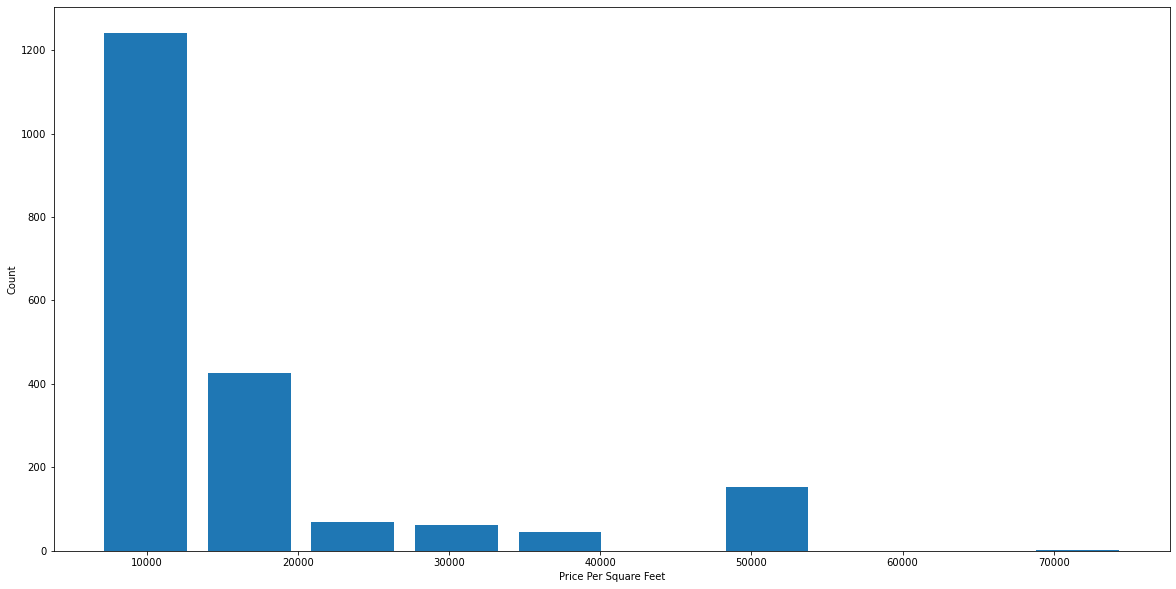

In [11]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [12]:
df2.Bathroom.unique()

array([2, 3, 1, 4, 5], dtype=int64)

Text(0, 0.5, 'Count')

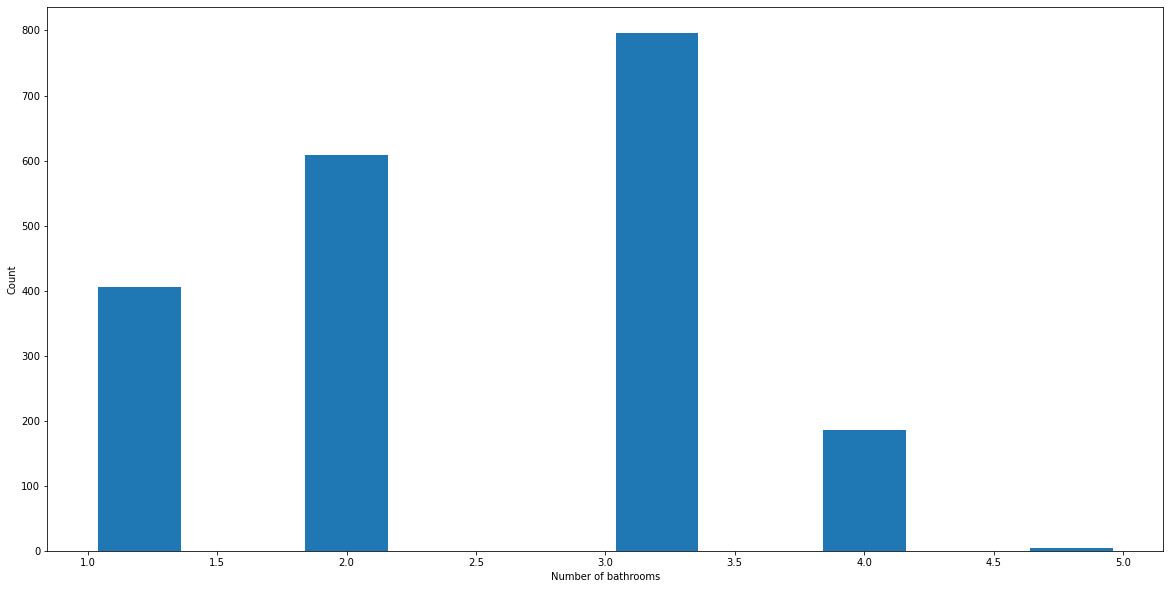

In [13]:
plt.hist(df2.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [14]:
df2.Bedroom.unique()

array([3, 2, 4, 5, 1, 6], dtype=int64)

Text(0, 0.5, 'Count')

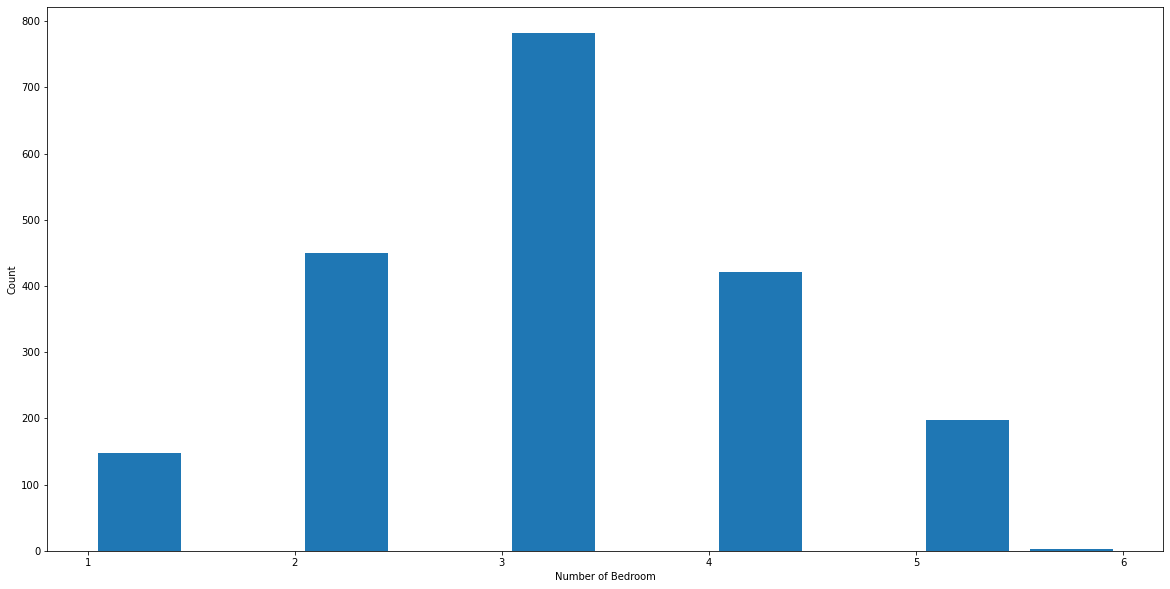

In [15]:
plt.hist(df2.Bedroom,rwidth=0.8)
plt.xlabel("Number of Bedroom")
plt.ylabel("Count")

In [16]:
df3 = df2.drop(['price_per_sqft'],axis='columns')
df3.head(3)

,Area,Bedroom,Bathroom,Floor,Services,Furnished,Price,Hotel,Compound
0,170,3,2,2,1,0,2200000,0,1
1,208,3,2,2,1,0,2600000,0,1
2,134,2,2,3,1,0,1407000,0,1


# Build a Model Now...


In [17]:
df3.shape

(1999, 9)

In [18]:
# features Withoutthe price column.
X = df3.drop(['Price'],axis='columns')
X.head(5)

,Area,Bedroom,Bathroom,Floor,Services,Furnished,Hotel,Compound
0,170,3,2,2,1,0,0,1
1,208,3,2,2,1,0,0,1
2,134,2,2,3,1,0,0,1
3,190,3,3,3,1,0,0,1
4,123,2,1,4,1,1,1,0


In [19]:
# the price
y = df3.Price
y.head(5)

0    2200000
1    2600000
2    1407000
3    1800000
4    9225000
Name: Price, dtype: int64

In [20]:
X.shape

(1999, 8)

In [21]:
y.shape

(1999,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
#using linear regression.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.736955353624448

In [24]:
# using decision tree.
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree = tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9333261548441669

# Use K Fold cross validation to measure accuracy of our  DecisionTreeRegressor model

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.84101705, 0.86435267, 0.92194204, 0.87711023, 0.92747772])

# Based on above results we can say that decision_tree	 gives the best score. Hence we will use that.



In [26]:
def predict_price(Area,Bedroom,Bathroom,Floor,Services,Furnished,Hotel,Compound):    
   

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bedroom
    x[2] = Bathroom
    x[3] = Floor
    x[4] = Services
    x[5] = Furnished
    x[6] = Hotel
    x[7] = Compound
  

    return tree.predict([x])[0]

In [27]:
predict_price(90,2,2, 6,0,0,0,1)

1264000.0

In [28]:
import pickle
with open('newCapital_home_prices_model.pickle','wb')as f:
    pickle.dump(tree,f)

In [30]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))